In [1]:
import pandas as pd
import numpy as np
import ast
import re
import random

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

# import nltk
# from nltk.corpus import stopwords
# from nltk.tokenize import word_tokenize
# from nltk import pos_tag
# from nltk.stem import WordNetLemmatizer

In [2]:
import gdown
# Replace this with your actual file ID
file_id = '1KSxmDfBq7x7pKNY36XqHWZAqZN8aQgNs'

# Generate download URL
url = f'https://drive.google.com/uc?id={file_id}&export=download'
output = 'review_final.csv'

# Download the CSV
gdown.download(url, output, quiet=False)

# Load into pandas DataFrame
review_data = pd.read_csv(output)

# Print the DataFrame
print(review_data.info())
review_data.head(3)

Downloading...
From (original): https://drive.google.com/uc?id=1KSxmDfBq7x7pKNY36XqHWZAqZN8aQgNs&export=download
From (redirected): https://drive.google.com/uc?id=1KSxmDfBq7x7pKNY36XqHWZAqZN8aQgNs&export=download&confirm=t&uuid=9d9d3490-8a30-4e70-ae60-7570c4ffee0f
To: c:\Users\user\Desktop\Y4S2\BT4222 Mining Web Data\Project\Yelp-JSON\Yelp JSON\yelp_dataset\review_final.csv
100%|██████████| 877M/877M [00:23<00:00, 36.7MB/s] 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836679 entries, 0 to 836678
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   review_id         836679 non-null  object 
 1   user_id           836679 non-null  object 
 2   business_id       836679 non-null  object 
 3   stars             836679 non-null  float64
 4   useful            836679 non-null  int64  
 5   funny             836679 non-null  int64  
 6   cool              836679 non-null  int64  
 7   text              836679 non-null  object 
 8   date              836679 non-null  object 
 9   text_length       836679 non-null  int64  
 10  processed_review  836588 non-null  object 
 11  sum_votes         836679 non-null  int64  
 12  review_age_days   836679 non-null  int64  
 13  review_weight     836679 non-null  float64
 14  weighted_stars    836679 non-null  float64
dtypes: float64(3), int64(6), object(6)
memory usage: 95.8+ MB
None


,review_id,user_id,business_id,stars,useful,funny,cool,text,date,text_length,processed_review,sum_votes,review_age_days,review_weight,weighted_stars
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11,101,decide eat aware going take hour beginning end...,0,2369,0.712890,2.138669
1,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03,48,wow yummy different delicious favorite lamb cu...,2,3649,0.593757,2.968783
2,oyaMhzBSwfGgemSGuZCdwQ,Dd1jQj7S-BFGqRbApFzCFw,YtSqYv1Q_pOltsVPSx54SA,5.0,0,0,0,Tremendous service (Big shout out to Douglas) ...,2013-06-24 11:21:25,42,tremendous service big shout douglas complemen...,0,4208,0.548185,2.740924


In [3]:
file_id2 = '19eRDb6kn3mrpNAYpoVNePc9RzsUikS9i'

# Generate download URL
url2 = f'https://drive.google.com/uc?id={file_id2}&export=download'
output2 = 'restaurants_final.csv'

# Download the CSV
gdown.download(url2, output2, quiet=False)

# Load into pandas DataFrame
restaurants_data = pd.read_csv(output2)
restaurants_data.drop('Unnamed: 0', axis=1, inplace=True) ## remove after data correction

# Print the DataFrame
print(restaurants_data.info())
restaurants_data.head(3)

Downloading...
From: https://drive.google.com/uc?id=19eRDb6kn3mrpNAYpoVNePc9RzsUikS9i&export=download
To: c:\Users\user\Desktop\Y4S2\BT4222 Mining Web Data\Project\Yelp-JSON\Yelp JSON\yelp_dataset\restaurants_final.csv
100%|██████████| 5.36M/5.36M [00:00<00:00, 37.4MB/s]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8069 entries, 0 to 8068
Data columns (total 68 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   business_id                      8069 non-null   object 
 1   city                             8069 non-null   object 
 2   postal_code                      8069 non-null   int64  
 3   categories                       8069 non-null   object 
 4   yelp_rating                      8069 non-null   float64
 5   name                             8069 non-null   object 
 6   RestaurantsTakeOut               8065 non-null   object 
 7   BusinessAcceptsCreditCards       7181 non-null   object 
 8   RestaurantsDelivery              8065 non-null   object 
 9   price_level                      7681 non-null   float64
 10  RestaurantsReservations          8061 non-null   object 
 11  HasTV                            6366 non-null   object 
 12  OutdoorSeating      

,business_id,city,postal_code,categories,yelp_rating,name,RestaurantsTakeOut,BusinessAcceptsCreditCards,RestaurantsDelivery,price_level,...,serves_beer,serves_wine,serves_cocktails,serves_dessert,serves_coffee,editorial_summary,good_for_watching_sports,menu_for_children,parking_options,editorial_summary_language
0,--epgcb7xHGuJ-4PUeSLAw,Willow Grove,19090,"Restaurants, Food, Bagels, Sandwiches, Breakfa...",3.0,Manhattan Bagel,True,True,True,1.0,...,False,False,False,False,True,Counter-serve chain specializing in NYC-style ...,False,False,"['freeParkingLot', 'freeStreetParking']",en
1,-0FX23yAacC4bbLaGPvyxw,Newtown,18940,"American (Traditional), Restaurants",3.5,The Grey Stone Fine Food and Spirits,True,True,True,3.0,...,True,True,True,True,True,NaN,False,True,"['freeParkingLot', 'freeStreetParking', 'valet...",NaN
2,-0TffRSXXIlBYVbb5AwfTg,Philadelphia,19107,"Cocktail Bars, Food Delivery Services, Nightli...",4.5,IndeBlue Modern Indian Food & Spirits,True,True,True,2.0,...,False,True,False,True,True,Modern & traditional Indian fare plus a tastin...,False,False,"['freeParkingLot', 'freeStreetParking', 'no fr...",en


In [4]:
file_id3 = '15l0CmR1b7xO4-U5yqSmgRR5V7CeWx3Vr'

# Generate download URL
url3 = f'https://drive.google.com/uc?id={file_id3}&export=download'
output3 = 'user.csv'

# Download the CSV
gdown.download(url3, output3, quiet=False)

# Load into pandas DataFrame
users = pd.read_csv(output3)

# Print the DataFrame
print(users.info())
users.head(3)

Downloading...
From (original): https://drive.google.com/uc?id=15l0CmR1b7xO4-U5yqSmgRR5V7CeWx3Vr&export=download
From (redirected): https://drive.google.com/uc?id=15l0CmR1b7xO4-U5yqSmgRR5V7CeWx3Vr&export=download&confirm=t&uuid=64436513-99d9-46d7-9bd8-1a32c7f6ac8f
To: c:\Users\user\Desktop\Y4S2\BT4222 Mining Web Data\Project\Yelp-JSON\Yelp JSON\yelp_dataset\user.csv
100%|██████████| 424M/424M [00:17<00:00, 24.2MB/s] 
C:\Users\user\AppData\Local\Temp\ipykernel_5972\1545845389.py:11: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  users = pd.read_csv(output3)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269461 entries, 0 to 269460
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   user_id                269461 non-null  object 
 1   name                   269461 non-null  object 
 2   review_count           269461 non-null  int64  
 3   yelping_since          269461 non-null  object 
 4   useful                 269461 non-null  int64  
 5   funny                  269461 non-null  int64  
 6   cool                   269461 non-null  int64  
 7   elite                  21171 non-null   object 
 8   friends                269461 non-null  object 
 9   fans                   269461 non-null  int64  
 10  average_stars          269461 non-null  float64
 11  compliment_hot         269461 non-null  int64  
 12  compliment_more        269461 non-null  int64  
 13  compliment_profile     269461 non-null  int64  
 14  compliment_cute        269461 non-nu

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,"('latitude', 'mean')","('longitude', 'mean')"
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,56,18,232,844,467,467,239,180,39.959457,-75.169912
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,157,251,1847,7054,3131,3131,1521,1946,39.988870,-75.191895
2,q_QQ5kBBwlCcbL1s4NVK3g,Jane,1221,2005-03-14 20:26:35,14953,9940,11211,"2006,2007,2008,2009,2010,2011,2012,2013,2014","xBDpTUbai0DXrvxCe3X16Q, 7GPNBO496aecrjJfW6UWtg...",1357,...,361,147,1212,5696,2543,2543,815,323,39.953551,-75.163223


In [5]:
# # read data
# pd.set_option('display.max_columns', None)
# restaurants_data = pd.read_csv('restaurants_final.csv')
# restaurants_data.drop('Unnamed: 0', axis=1, inplace=True) ## remove after data correction
# print(restaurants_data.head())
# review_data = pd.read_csv('review_final.csv')
# print(review_data.head())
# users = pd.read_csv('PA_restaurant_user_with_loc.csv')
# print(users.head())

In [6]:
def convert_list_str(text):
    try:
        items = ast.literal_eval(text)
        return ' '.join(items) if isinstance(items, list) else text
    except Exception:
        return text

def create_full_description(df, text_features):
    # Fill missing values
    # features = text_features + bool_features
    features = text_features
    df[features] = df[features].fillna('')
    
    # Fill missing editorial_summary with types + categories (without commas)
    df['editorial_summary'] = df['editorial_summary'].apply(lambda x: x if x.strip() != '' else '')
    # df['types'] = df['types'].str.replace(',', ' ')
    df['categories'] = df['categories'].str.replace(',', ' ')
    df.loc[df['editorial_summary'].str.strip() == '', 'editorial_summary'] = (
        df['categories']
    )
    
    # Convert list-formatted column to plain text
    # df[list_feature] = df[list_feature].apply(convert_list_str)

    # Remove commas from all text features
    for col in text_features:
        df[col] = df[col].str.replace(',', ' ')
    
    # if len(bool_features) != 0:
    #     # Convert boolean columns to descriptive tags
    #     for col in bool_features:
    #         df[col] = df[col].apply(lambda x: f"{col.lower()}" if x == True else "")
        
    # Combine all into a single description column
    df['description'] = df[text_features]\
        .agg(' '.join, axis=1)\
        .str.replace(r'\s+', ' ', regex=True)\
        .str.strip()

    return df

In [7]:
item_df = restaurants_data.copy() 
# text_features = ['categories', 'editorial_summary', 'types', 'city']
text_features = ['categories', 'editorial_summary', 'city', 'name']
# bool_features = [
#             'OutdoorSeating', 'RestaurantsTakeOut', 'RestaurantsDelivery',
#             'RestaurantsReservations', 'GoodForKids', 'RestaurantsGoodForGroups',
#             'HappyHour', 'serves_breakfast', 'serves_lunch', 'serves_dinner',
#             'serves_brunch', 'serves_beer', 'serves_wine', 'serves_cocktails',
#             'serves_dessert', 'serves_coffee', 'BusinessAcceptsCreditCards', 'HasTV',
#             'BikeParking', 'Caters', 'RestaurantsTableService',
#         ]
bool_features = []
# list_features = ['parking_options']
list_features = []
# handle WiFi column
# handle RestaurantsAttire column
# handle BusinessParking column
# handle NoiseLevel column
# handle Ambience column
# handle GoodForMeal column
# remove WheelchairAccessible column
# handle Alcohol column
# handle DogsAllowed column



item_df = create_full_description(item_df, text_features)
# remove text features
item_df = item_df.drop(text_features, axis=1)
print(item_df[['business_id', 'description']].head())
print(item_df.head())


              business_id                                        description
0  --epgcb7xHGuJ-4PUeSLAw  Restaurants Food Bagels Sandwiches Breakfast &...
1  -0FX23yAacC4bbLaGPvyxw  American (Traditional) Restaurants American (T...
2  -0TffRSXXIlBYVbb5AwfTg  Cocktail Bars Food Delivery Services Nightlife...
3  -1B9pP_CrRBJYPICE5WbRA  Asian Fusion Restaurants American (New) Thai S...
4  -3725FZiIIYdwQtM4MKEIA  Pizza Sandwiches Chicken Wings Restaurants Del...
              business_id  postal_code  yelp_rating RestaurantsTakeOut  \
0  --epgcb7xHGuJ-4PUeSLAw        19090          3.0               True   
1  -0FX23yAacC4bbLaGPvyxw        18940          3.5               True   
2  -0TffRSXXIlBYVbb5AwfTg        19107          4.5               True   
3  -1B9pP_CrRBJYPICE5WbRA        19107          4.0               True   
4  -3725FZiIIYdwQtM4MKEIA        19342          1.5               True   

  BusinessAcceptsCreditCards RestaurantsDelivery  price_level  \
0                       True

In [8]:
bool_features = [
            'OutdoorSeating', 'RestaurantsTakeOut', 'RestaurantsDelivery',
            'RestaurantsReservations', 'GoodForKids', 'RestaurantsGoodForGroups',
            'serves_breakfast', 'serves_lunch', 'serves_dinner',
            'serves_brunch', 'serves_beer', 'serves_wine', 'serves_cocktails',
            'serves_dessert', 'serves_coffee', 'BusinessAcceptsCreditCards',
        ]

# check for missing values in bool features
print(item_df[bool_features].isnull().sum())
# we remove HappyHour, HasTV, BikeParking, Caters, RestaurantsTableService due to the high number of missing values
# confirm that these columns only contain true/false values
print(item_df[bool_features].describe())
# fill missing values with False (we assume that if the value is not present, it is False)
item_df[bool_features] = item_df[bool_features].fillna(False)
# convert bool features to int
for col in bool_features:
    item_df[col] = item_df[col].astype(int)

print(item_df[bool_features].describe()) # confirm that these columns only contain 0/1 values


OutdoorSeating                  8
RestaurantsTakeOut              4
RestaurantsDelivery             4
RestaurantsReservations         8
GoodForKids                    12
RestaurantsGoodForGroups        9
serves_breakfast               28
serves_lunch                   28
serves_dinner                  28
serves_brunch                  28
serves_beer                    28
serves_wine                    28
serves_cocktails               28
serves_dessert                 28
serves_coffee                  28
BusinessAcceptsCreditCards    888
dtype: int64
       OutdoorSeating RestaurantsTakeOut RestaurantsDelivery  \
count            8061               8065                8065   
unique              2                  2                   2   
top             False               True                True   
freq             5238               7669                6015   

       RestaurantsReservations GoodForKids RestaurantsGoodForGroups  \
count                     8061        8057         

In [9]:
# select only the columns we need
# item_df = item_df[['business_id', 'description'] + bool_features]
item_df = item_df[['business_id'] + bool_features]
print(item_df.shape)
print(item_df.columns)
print(item_df.head())

(8069, 17)
Index(['business_id', 'OutdoorSeating', 'RestaurantsTakeOut',
       'RestaurantsDelivery', 'RestaurantsReservations', 'GoodForKids',
       'RestaurantsGoodForGroups', 'serves_breakfast', 'serves_lunch',
       'serves_dinner', 'serves_brunch', 'serves_beer', 'serves_wine',
       'serves_cocktails', 'serves_dessert', 'serves_coffee',
       'BusinessAcceptsCreditCards'],
      dtype='object')
              business_id  OutdoorSeating  RestaurantsTakeOut  \
0  --epgcb7xHGuJ-4PUeSLAw               0                   1   
1  -0FX23yAacC4bbLaGPvyxw               1                   1   
2  -0TffRSXXIlBYVbb5AwfTg               1                   1   
3  -1B9pP_CrRBJYPICE5WbRA               0                   1   
4  -3725FZiIIYdwQtM4MKEIA               0                   1   

   RestaurantsDelivery  RestaurantsReservations  GoodForKids  \
0                    1                        0            0   
1                    1                        1            1   
2       

In [10]:
review_df = review_data.copy()
review_df['interaction'] = review_df['stars'].apply(lambda x: 1 if x >= 3 else 0)
interaction_df = review_df[['user_id', 'business_id', 'stars', 'interaction', 'date']].copy()
print(interaction_df.head(2))

                  user_id             business_id  stars  interaction  \
0  mh_-eMZ6K5RLWhZyISBhwA  XQfwVwDr-v0ZS3_CbbE5Xw    3.0            1   
1  _7bHUi9Uuf5__HHc_Q8guQ  kxX2SOes4o-D3ZQBkiMRfA    5.0            1   

                  date  
0  2018-07-07 22:09:11  
1  2015-01-04 00:01:03  


In [81]:
numerical_user_features = ['review_count', 'useful', 'funny', 'cool', 'fans', 'average_stars', 'compliment_hot', 'compliment_more', 'compliment_profile',
                           'compliment_cute', 'compliment_list', 'compliment_note', 'compliment_plain', 'compliment_writer', 'compliment_cool', 
                           'compliment_funny', 'compliment_photos', "('latitude', 'mean')", "('longitude', 'mean')"]
# select only the columns we need
user_df = users.copy()
# not yet handled latitude and longitude
user_df = user_df[['user_id'] + numerical_user_features]
print(user_df.shape)

# standardize numerical features to between 0 and 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
user_df[numerical_user_features] = scaler.fit_transform(user_df[numerical_user_features])
print(user_df.head(2))
print(user_df.describe())

(269461, 20)
                  user_id  review_count     useful      funny       cool  \
0  qVc8ODYU5SZjKXVBgXdI7w      3.903999   6.200489   1.578685   5.832527   
1  j14WgRoU_-2ZE1aw1dXrJg     30.667640  37.375215  16.803843  26.718301   

        fans  average_stars  compliment_hot  compliment_more  \
0   7.313602       0.237336        2.055843         4.371737   
1  86.805203       0.076704        9.521804        17.867412   

   compliment_profile  compliment_cute  compliment_list  compliment_note  \
0            2.634412         6.087233         2.227361         1.572754   
1            8.854455        17.113694        31.277546        12.666027   

   compliment_plain  compliment_writer  compliment_cool  compliment_funny  \
0          3.502573           4.527942         2.802396          2.802396   
1         29.462154          29.030561        18.984195         18.984195   

   compliment_photos  ('latitude', 'mean')  ('longitude', 'mean')  
0           1.213775             -0.

In [90]:
# random sample 100 users
# user_df = user_df.sample(1000, random_state=42)

user_df = user_df[user_df['review_count'] >= 2]

# combine user, restaurant and review data
user_restaurant_review = pd.merge(interaction_df, item_df, on='business_id', how='left')
user_restaurant_review = pd.merge(user_restaurant_review, user_df, on='user_id', how='right')
print(user_restaurant_review.shape)
print(user_restaurant_review.describe())
print(user_restaurant_review.head(2))

# remove name, yelping_since, 

(86755, 40)
              stars   interaction  OutdoorSeating  RestaurantsTakeOut  \
count  86755.000000  86755.000000    86755.000000        86755.000000   
mean       3.847225      0.901839        0.558804            0.944084   
std        0.997525      0.297535        0.496533            0.229761   
min        1.000000      0.000000        0.000000            0.000000   
25%        3.000000      1.000000        0.000000            1.000000   
50%        4.000000      1.000000        1.000000            1.000000   
75%        5.000000      1.000000        1.000000            1.000000   
max        5.000000      1.000000        1.000000            1.000000   

       RestaurantsDelivery  RestaurantsReservations   GoodForKids  \
count         86755.000000             86755.000000  86755.000000   
mean              0.770250                 0.450729      0.706472   
std               0.420675                 0.497569      0.455381   
min               0.000000                 0.000000   

In [14]:
import os
import urllib.request
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from torch.utils.data import Dataset, DataLoader, random_split


In [91]:
class RestaurantRatingModel(nn.Module):
    def __init__(self, num_users, num_restaurants, embedding_dim=32):
        super(RestaurantRatingModel, self).__init__()
        self.user_embedding = nn.Embedding(num_users, embedding_dim)
        self.restaurant_embedding = nn.Embedding(num_restaurants, embedding_dim)
        self.mlp = nn.Sequential(
            nn.Linear(2*embedding_dim, 256), # 2x embedding_dim because we concatenate user and item embeddings
            nn.ReLU(),
            nn.Linear(256, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(64, 1)
        )

    def forward(self, user, restaurant):
        user_embedding = self.user_embedding(user)
        restaurant_embedding = self.restaurant_embedding(restaurant)
        concat = torch.cat([user_embedding, restaurant_embedding], dim=1)
        output = self.mlp(concat)
        return output

In [92]:
# class RestaurantRatingModel(nn.Module):
#     def __init__(self, num_users, num_restaurants, user_num_features, restaurant_num_features, embedding_dim=50):
#         super(RestaurantRatingModel, self).__init__()
        
#         # User tower components
#         self.user_embedding = nn.Embedding(num_users, embedding_dim)
#         self.user_fc = nn.Linear(embedding_dim + user_num_features, 128)
        
#         # Restaurant tower components
#         self.restaurant_embedding = nn.Embedding(num_restaurants, embedding_dim)
#         self.restaurant_fc = nn.Linear(embedding_dim + restaurant_num_features, 128)

#         # Review tower components
#         self.review_embedding = nn.Embedding(num_reviews, embedding_dim)
#         self.review_fc = nn.Linear(embedding_dim + review_num_features, 128)
        
#         # Combined MLP
#         self.combined_fc1 = nn.Linear(256, 256)
#         self.combined_fc2 = nn.Linear(256, 128)
#         self.output = nn.Linear(128, 1)
        
#         # Activation function
#         self.relu = nn.ReLU()
        
#     def forward(self, user_id, user_numerical, restaurant_id, restaurant_numerical):
#         # User tower
#         user_emb = self.user_embedding(user_id).squeeze(1)
#         user_combined = torch.cat([user_emb, user_numerical], dim=1)
#         user_out = self.relu(self.user_fc(user_combined))
        
#         # Restaurant tower
#         restaurant_emb = self.restaurant_embedding(restaurant_id).squeeze(1)
#         restaurant_combined = torch.cat([restaurant_emb, restaurant_numerical], dim=1)
#         restaurant_out = self.relu(self.restaurant_fc(restaurant_combined))
        
#         # Combine towers
#         merged = torch.cat([user_out, restaurant_out], dim=1)
#         x = self.relu(self.combined_fc1(merged))
#         x = self.relu(self.combined_fc2(x))
#         output = self.output(x)
        
#         return output

# You'll need to create a custom Dataset class for your data
class RestaurantDataset(Dataset):
    def __init__(self, dataframe):
        self.user_ids = torch.tensor(dataframe['user_id_encoded'].values, dtype=torch.long)
        # self.user_numerical = torch.FloatTensor(user_numerical)
        self.restaurant_ids = torch.tensor(dataframe['business_id_encoded'].values, dtype=torch.long)
        # self.restaurant_numerical = torch.FloatTensor(restaurant_numerical)
        self.ratings = torch.tensor(dataframe['interaction'].values, dtype=torch.float32)
        
    def __len__(self):
        return len(self.ratings)
    
    def __getitem__(self, idx):
        return self.user_ids[idx], self.restaurant_ids[idx], self.ratings[idx]


In [93]:
# encode user_id and restaurant_id
from sklearn.preprocessing import LabelEncoder

user_encoder = LabelEncoder()
restaurant_encoder = LabelEncoder()

user_restaurant_review['user_id_encoded'] = user_encoder.fit_transform(user_restaurant_review['user_id'])
user_restaurant_review['business_id_encoded'] = restaurant_encoder.fit_transform(user_restaurant_review['business_id'])

train_df = user_restaurant_review[user_restaurant_review['date'] < '2021-01-01']
test_df = user_restaurant_review[user_restaurant_review['date'] >= '2021-01-01']

# remove date column
train_df.drop(['date'], axis=1, inplace=True)
test_df.drop(['date'], axis=1, inplace=True)

train_dataset = RestaurantDataset(train_df)
test_dataset = RestaurantDataset(test_df)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# train_X = train_df.drop(['stars', 'interaction'], axis=1)
# train_y = train_df['interaction']
# # train_y = train_df['stars']
# # take only 5000 samples for training
# train_X = train_X.sample(n=5000, random_state=42)
# train_y = train_y[train_X.index]

# # test_X = test_df.drop(['user_id', 'business_id', 'stars', 'interaction', 'date'], axis=1)
# test_X = test_df.drop(['stars', 'interaction'], axis=1)
# test_y = test_df['interaction']
# # test_y = test_df['stars']
# print(train_X.head(2))

C:\Users\user\AppData\Local\Temp\ipykernel_5972\2697759408.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.drop(['date'], axis=1, inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_5972\2697759408.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df.drop(['date'], axis=1, inplace=True)


In [117]:
import pickle

user_restaurant_review.to_csv("user_restaurant_review.csv")
with open('item_ncf_encoder.pkl', 'wb') as f:
    pickle.dump(restaurant_encoder, f)
    
with open('user_ncf_encoder.pkl', 'rb') as f:
    restaurant_encoder_ncf = pickle.load(f)

In [95]:
# Example usage:
# Assuming you have prepared your data
num_users = len(np.unique(user_restaurant_review['user_id_encoded']))
num_restaurants = len(np.unique(user_restaurant_review['business_id_encoded']))
user_num_features = len(numerical_user_features)
restaurant_num_features = len(bool_features)

model = RestaurantRatingModel(
    num_users=num_users,
    num_restaurants=num_restaurants,
    # user_num_features=user_num_features,
    # restaurant_num_features=restaurant_num_features,
    embedding_dim= 64
)

# Define loss and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [96]:
# Example training loop
def train(model, dataloader, criterion, optimizer, num_epochs=10):
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for batch in dataloader:
            user, item, label = batch
            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(user, item)
            loss = criterion(outputs.squeeze(), label)
            
            # Backward pass and optimize
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
        
        print(f'Epoch {epoch+1}, Loss: {running_loss/len(dataloader)}')
        evaluate_model(model, test_loader)

def evaluate_model(model, dataloader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for batch in dataloader:
            user, item, label = batch
            outputs = model(user, item)
            predicted = (outputs.squeeze() >= 0.5).float()  # Assuming binary classification
            total += label.size(0)
            correct += (predicted == label).sum().item()

    accuracy = correct / total
    print(f'Test Accuracy: {accuracy * 100:.2f}%')

In [97]:
# Train the model
train(model, train_loader, criterion, optimizer, num_epochs=10)

Epoch 1, Loss: 0.15191831397697156
Test Accuracy: 91.04%
Epoch 2, Loss: 0.09277932828850319
Test Accuracy: 91.04%
Epoch 3, Loss: 0.08621217892632062
Test Accuracy: 91.04%
Epoch 4, Loss: 0.08410322151367883
Test Accuracy: 91.04%
Epoch 5, Loss: 0.08244918926187758
Test Accuracy: 91.04%
Epoch 6, Loss: 0.08036846307610028
Test Accuracy: 91.04%
Epoch 7, Loss: 0.07809178082975432
Test Accuracy: 91.04%
Epoch 8, Loss: 0.07587882085098135
Test Accuracy: 91.04%
Epoch 9, Loss: 0.07323288554289462
Test Accuracy: 91.04%
Epoch 10, Loss: 0.07074276437468334
Test Accuracy: 91.04%


In [37]:
# history = model.fit(
#     [train_X['user_id'], train_X[user_num_features], train_X['business_id'], train_X[restaurant_num_features]],
#     train_y,
#     validation_data=([test_X['user_id'], test_X[user_num_features], test_X['business_id'], test_X[restaurant_num_features]], test_y),
#     epochs=10, batch_size=64
# )

In [38]:
# def recommend_top_restaurants(user_id, model, restaurants_data, user_features):
#     user_data = user_features[user_features['user_id'] == user_id].iloc[0]
#     user_inputs = np.array([user_id]), user_data[user_num_features].values.reshape(1, -1)
    
#     restaurant_scores = []
#     for _, restaurant in restaurants_data.iterrows():
#         restaurant_inputs = np.array([restaurant['business_id']]), restaurant[restaurant_num_features].values.reshape(1, -1)
#         score = model.predict([user_inputs[0], user_inputs[1], restaurant_inputs[0], restaurant_inputs[1]])
#         restaurant_scores.append((restaurant['business_id'], score))
    
#     # Sort and select top 10
#     restaurant_scores.sort(key=lambda x: x[1], reverse=True)
#     return restaurant_scores[:10]

# # Example usage
# # top_restaurants = recommend_top_restaurants(user_id="X88LNRDRZ_1TooB71AIgpA", model=model, restaurants_data=item_df, user_features=user_df)
# # print("Top 10 Recommendations:", top_restaurants)

# def evaluate_model(model, test_X, test_y):
#     predictions = model.predict([test_X['user_id'], test_X[user_numerical_features], test_X['business_id'], test_X[restaurant_numerical_features]])

In [39]:
# run evaluations with NDCG@10, Precision@10

import numpy as np
from sklearn.metrics import ndcg_score, precision_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve


def evaluate_model_final(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    predictions = []
    labels = []
    with torch.no_grad():
        for batch in test_loader:
            user, item, label = batch
            outputs = model(user, item)
            predicted = (outputs.squeeze() >= 0.5).float()  # Assuming binary classification
            total += label.size(0)
            correct += (predicted == label).sum().item()
            predictions.extend(outputs.squeeze().numpy())
            labels.extend(label.numpy())

    accuracy = correct / total
    print(f'Test Accuracy: {accuracy * 100:.2f}%')
    rmse = np.sqrt(mean_squared_error(labels, predictions))
    print(f"RMSE: {rmse:.4f}")
    ndcg = ndcg_score([labels], [predictions], k=10)
    print(f"NDCG@10: {ndcg:.4f}")
    # precision = precision_score([labels], [predictions])
    # print(f"Precision@10: {precision:.4f}")


    # predictions = model.predict([test_X['user_id'], test_X['business_id']])
    # predictions = predictions.flatten()
    # rmse = np.sqrt(mean_squared_error(test_y, predictions))
    # print(f"RMSE: {rmse:.4f}")
    # ndcg = ndcg_score([test_y], [predictions], k=10)
    # print(f"NDCG@10: {ndcg:.4f}")
    # precision = precision_score([test_y], [predictions], k=10)
    # print(f"Precision@10: {precision:.4f}")
    # return rmse, ndcg, precision

evaluate_model_final(model, test_loader)

# rmse = evaluate_model(model, test_X, test_y)
# print(f"RMSE: {rmse:.4f}")

# # calculate NDCG@10
# ndcg = ndcg_score([test_y], [predictions], k=10)
# print(f"NDCG@10: {ndcg:.4f}")

# # calculate Precision@10
# precision = precision_score([test_y], [predictions], k=10)
# print(f"Precision@10: {precision:.4f}")


Test Accuracy: 69.16%
RMSE: 0.4563
NDCG@10: 0.7760


In [118]:
torch.save(model.state_dict(), 'NCF_model.pth')

In [114]:
def get_recommendation(user_id, k=10):
    model.eval()
    user_restaurant_review_specific = user_restaurant_review[user_restaurant_review['user_id'] == user_id]
    dataset = RestaurantDataset(user_restaurant_review_specific)
    dataloader = DataLoader(dataset, batch_size=1, shuffle=False)

    # get predictions for all restaurants
    restaurant_scores = []
    with torch.no_grad():
        for batch in dataloader:
            user, item, _ = batch
            outputs = model(user, item)
            restaurant_scores.append((item.item(), outputs.item()))

    # sort by predicted rating
    restaurant_scores.sort(key=lambda x: x[1], reverse=True)
    # get top k restaurants
    recommended_restaurants = restaurant_scores[:k]
    # convert to DataFrame
    recommended_restaurants_df = pd.DataFrame(recommended_restaurants, columns=['business_id_encoded', 'predicted_rating'])
    # add business_id
    recommended_restaurants_df['business_id'] = restaurant_encoder.inverse_transform(recommended_restaurants_df['business_id_encoded'])
    return recommended_restaurants_df

def hits_at_k(user_id, test_df, recommend_func, k=10):
    # true_item = test_df.loc[test_df['user_id'] == user_id]['business_id'].iloc[0]
    true_items = test_df[(test_df['user_id'] == user_id) &
                         # Hit rate should consider if the user liked the restaurant
                         (test_df['interaction'] == 1)
                         ]['business_id'].tolist()
    recommended = recommend_func(user_id, k)

    recommended_items = recommended['business_id'].tolist()

    return int(any(item in recommended_items for item in true_items))

def plot_hit_rate_vs_users(test_df, max_users, step):
    # Step 1: Get users sorted by interaction count descending
    user_interaction_counts = (
        test_df.groupby('user_id')
        .size()
        .sort_values(ascending=False)
    )
    sorted_users = user_interaction_counts.index.tolist()


    # Step 2: Loop with cumulative hit calculation
    hit_rates = []
    total_hits = 0
    evaluated_users = 0

    for i in range(step, max_users + 1, step):
        current_batch = sorted_users[evaluated_users:i]
        hits_in_batch = sum(
            hits_at_k(user, test_df, get_recommendation, k=10)
            for user in current_batch
        )
        total_hits += hits_in_batch
        evaluated_users = i
        hit_rate = total_hits / evaluated_users
        hit_rates.append(hit_rate)

    # Step 3: Plot
    n_users_range = list(range(step, max_users + 1, step))
    plt.figure(figsize=(10, 6))
    print(n_users_range, hit_rates)
    plt.plot(n_users_range, hit_rates, marker='o', linestyle='-', color='b')
    plt.xlabel("Number of Top Users (by Interactions)")
    plt.ylabel("Hit Rate@10")
    plt.title("Hit Rate vs. Number of Included Users")
    plt.grid(True)
    plt.show()

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100] [0.9, 0.85, 0.9, 0.85, 0.82, 0.7666666666666667, 0.7142857142857143, 0.7, 0.6888888888888889, 0.68]


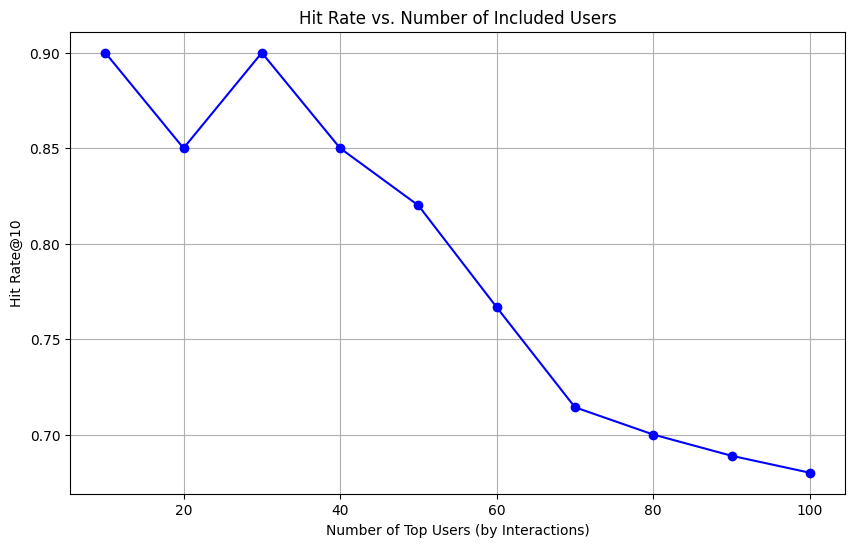

In [116]:
# torch.set_default_tensor_type(torch.FloatTensor)  # force CPU tensors
# model = model.cpu()

plot_hit_rate_vs_users(test_df, max_users=100, step=10)

In [112]:
top_users = (
    test_df
    .groupby('user_id')
    .size()
    .sort_values(ascending=False)
    .head(10)
    .index.tolist()
)

get_recommendation(top_users[0], 10)

,business_id_encoded,predicted_rating,business_id
0,579,1.290466,4KJGnr4UB_0K4G4H6Y5YLQ
1,2820,1.260048,QNR-_GN_hg8YVCRq57xbJw
2,3440,1.242222,W5e4UAY9PoE3ydedIcc5GA
3,4130,1.236505,bq5du_Ue5ZXii8SrQZxjdw
4,2075,1.233302,IsS22La1wik7_VENzLO8uw
5,2475,1.230654,MnB5oYCBXbiF8VkIiyU44A
6,6188,1.217557,ui4DfohP2wEh-BJbr_2D-w
7,5842,1.210150,rKggQN5KT6AtOlmuJ8NAZQ
8,6128,1.206241,u9XTeDl_If4U5Eixl6ys7g
9,2147,1.204580,JcdsERaKlWNY9CT5Tl8LvA
